In [ ]:
# Description :
# This pogram is designed to predict a stock of your choosing with an Recurrent Neural Network called Long Short Term Memory
# (LSTM).  You are able to put in an amount of time to track of your choosing (100 days, 52 week, etc.)
#
#

In [188]:
# IMPORT DATA SCIENCE LIBRARIES
import numpy as np
import pandas as pd
from datetime import datetime
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt 
import seaborn as sns
import yfinance as yf
%matplotlib inline

In [189]:
# ADVANCED PLOTING LIBRARIES
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [190]:
init_notebook_mode(connected=True)

In [191]:
# Use cufflinks offline
cf.go_offline()

In [192]:
# New Yahoo Finance workaround
yf.pdr_override()

In [193]:
# Stock LOOKUP
stock = input('Enter a stock ticker symbol: ')
print(stock)

Enter a stock ticker symbol: KR
KR


In [194]:
StockStart = '2018-07-01'
StockEnd = datetime.today().strftime('%Y-%m-%d')

In [195]:
df = pdr.get_data_yahoo(stock,start=StockStart,end=StockEnd)

[*********************100%***********************]  1 of 1 completed


In [196]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-16,33.900002,34.310001,33.639999,33.730000,33.730000,7005400
2020-07-17,33.849998,34.180000,33.779999,33.849998,33.849998,6167900
2020-07-20,33.799999,34.160000,33.619999,34.150002,34.150002,8063200
2020-07-21,34.360001,35.580002,34.340000,34.790001,34.790001,11880800
2020-07-22,34.900002,35.160000,34.580002,35.160000,35.160000,6464200


In [197]:
# MAKE 50 DAY MOVING AVERAGE
ma = 50
smaString = 'SMA_'+str(ma)
df[smaString] = df['Adj Close'].rolling(window=ma).mean()


In [198]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_50
Date,,,,,,,
2018-07-02,28.400000,28.520000,27.860001,28.219999,27.039478,9545800,NaN
2018-07-03,28.309999,28.940001,28.309999,28.700001,27.499399,4641300,NaN
2018-07-05,28.809999,29.020000,28.440001,28.600000,27.403580,8165500,NaN
2018-07-06,28.580000,29.230000,28.580000,29.120001,27.901829,6987800,NaN
2018-07-09,29.070000,29.180000,28.660000,28.750000,27.547306,5523500,NaN


In [199]:
df.iloc[48:50]

,Open,High,Low,Close,Adj Close,Volume,SMA_50
Date,,,,,,,
2018-09-10,32.119999,32.150002,31.629999,31.750000,30.564970,10614100,NaN
2018-09-11,31.830000,32.080002,31.370001,31.389999,30.218405,14372000,28.688762


In [200]:
df.iloc[(ma-2):51]

,Open,High,Low,Close,Adj Close,Volume,SMA_50
Date,,,,,,,
2018-09-10,32.119999,32.150002,31.629999,31.750000,30.564970,10614100,NaN
2018-09-11,31.830000,32.080002,31.370001,31.389999,30.218405,14372000,28.688762
2018-09-12,31.500000,31.830000,31.090000,31.730000,30.545715,11846000,28.758887


In [201]:
# BECAUSE THE FIRST 50 DAYS IS OUT OF RANGE FOR A 50 DAY MOVING AVERAGE
# WE TRIM THE DATAFRAME TO REMOVE THE MA VALUE
df = df.iloc[(ma-1):]

In [202]:
# NOW OUR DATAFRAME SHOULD START WITH A SMA_50
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_50
Date,,,,,,,
2018-09-11,31.830000,32.080002,31.370001,31.389999,30.218405,14372000,28.688762
2018-09-12,31.500000,31.830000,31.090000,31.730000,30.545715,11846000,28.758887
2018-09-13,28.610001,29.180000,28.299999,28.580000,27.513287,32474400,28.759165
2018-09-14,28.600000,28.610001,27.760000,27.799999,26.762396,18729600,28.746341
2018-09-17,27.750000,28.980000,27.540001,28.840000,27.763580,16749800,28.743576


In [203]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SMA_50
count,469.000000,469.000000,469.000000,469.000000,469.000000,4.690000e+02,469.000000
mean,27.696269,28.082324,27.335331,27.713689,27.205106,9.232672e+06,27.004764
std,3.369493,3.491581,3.273500,3.377143,3.483575,5.258081e+06,2.984168
min,20.790001,21.000000,20.700001,20.820000,20.342707,1.641100e+06,21.718111
25%,24.889999,25.120001,24.530001,24.840000,24.391006,5.882200e+06,24.375759
50%,28.070000,28.370001,27.760000,28.080000,27.365824,7.809900e+06,27.545881
75%,29.799999,30.340000,29.420000,29.760000,29.043940,1.077280e+07,28.706865
max,35.750000,36.840000,34.580002,35.160000,35.160000,4.542470e+07,32.959051


In [204]:
# Check to see if the adj close for each day is above of below the moving average
# Check to see if Date is index row
df.index

DatetimeIndex(['2018-09-11', '2018-09-12', '2018-09-13', '2018-09-14',
               '2018-09-17', '2018-09-18', '2018-09-19', '2018-09-20',
               '2018-09-21', '2018-09-24',
               ...
               '2020-07-09', '2020-07-10', '2020-07-13', '2020-07-14',
               '2020-07-15', '2020-07-16', '2020-07-17', '2020-07-20',
               '2020-07-21', '2020-07-22'],
              dtype='datetime64[ns]', name='Date', length=469, freq=None)

In [205]:
# ITERATE THROUGH DAYS TO SEE IF THE ADJ CLOSE IS HIGHER THAN SMA_50
numH = 0
numC = 0
for i in df.index:
    
    if(df['Adj Close'][i]>df[smaString][i]):
        numH += 1
        print('Adj Close is Higher')
    else:
        numC += 1
        print('SMA_50 is Higher')
print('Adj Close was higher '+str(numH)+' times')
print('SMA_50 was higher '+str(numC)+' times')

Adj Close is Higher
Adj Close is Higher
SMA_50 is Higher
SMA_50 is Higher
SMA_50 is Higher
SMA_50 is Higher
SMA_50 is Higher
SMA_50 is Higher
Adj Close is Higher
SMA_50 is Higher
SMA_50 is Higher
SMA_50 is Higher
SMA_50 is Higher
SMA_50 is Higher
SMA_50 is Higher
SMA_50 is Higher
SMA_50 is Higher
SMA_50 is Higher
SMA_50 is Higher
SMA_50 is Higher
SMA_50 is Higher
SMA_50 is Higher
SMA_50 is Higher
SMA_50 is Higher
SMA_50 is Higher
SMA_50 is Higher
SMA_50 is Higher
SMA_50 is Higher
SMA_50 is Higher
SMA_50 is Higher
SMA_50 is Higher
SMA_50 is Higher
SMA_50 is Higher
SMA_50 is Higher
SMA_50 is Higher
Adj Close is Higher
Adj Close is Higher
SMA_50 is Higher
Adj Close is Higher
Adj Close is Higher
Adj Close is Higher
Adj Close is Higher
Adj Close is Higher
Adj Close is Higher
Adj Close is Higher
Adj Close is Higher
Adj Close is Higher
Adj Close is Higher
Adj Close is Higher
Adj Close is Higher
Adj Close is Higher
Adj Close is Higher
Adj Close is Higher
Adj Close is Higher
Adj Close is Higher

In [206]:
#ADD EMAS TO THE DF
# CHOOSE THE Exponential Moving Averages TO USE
emasUsed = [3,5,8,10,12,15,30,35,40,45,50,60]

for q in emasUsed:
    ema = q
    

In [207]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_50,EMA_3,EMA_5,EMA_8,EMA_10,EMA_12,EMA_15,EMA_30,EMA_35,EMA_40,EMA_45,EMA_50,EMA_60
Date,,,,,,,,,,,,,,,,,,,
2018-09-11,31.830000,32.080002,31.370001,31.389999,30.218405,14372000,28.688762,30.22,30.22,30.22,30.22,30.22,30.22,30.22,30.22,30.22,30.22,30.22,30.22
2018-09-12,31.500000,31.830000,31.090000,31.730000,30.545715,11846000,28.758887,30.38,30.33,30.29,30.28,30.27,30.26,30.24,30.24,30.23,30.23,30.23,30.23
2018-09-13,28.610001,29.180000,28.299999,28.580000,27.513287,32474400,28.759165,28.95,29.39,29.67,29.78,29.84,29.92,30.06,30.09,30.10,30.11,30.12,30.14
2018-09-14,28.600000,28.610001,27.760000,27.799999,26.762396,18729600,28.746341,27.86,28.51,29.03,29.23,29.37,29.52,29.85,29.90,29.94,29.97,29.99,30.03
2018-09-17,27.750000,28.980000,27.540001,28.840000,27.763580,16749800,28.743576,27.81,28.26,28.75,28.96,29.12,29.30,29.72,29.78,29.83,29.87,29.91,29.96


In [208]:
# CHECK whether or not it's a red-white-blue pattern at each date with FOR LOOP

pos = 0
num = 0
percent_change = []

for i in df.index:
    #minimum of short term emas
    cmin = min(df['EMA_3'][i],df['EMA_5'][i],df['EMA_8'][i],df['EMA_10'][i],df['EMA_12'][i],df['EMA_15'][i])
    #maximum of long term emas
    cmax = max(df['EMA_30'][i],df['EMA_35'][i],df['EMA_40'][i],df['EMA_45'][i],df['EMA_50'][i],df['EMA_60'][i])
    # Adj Closing Value
    close = df['Adj Close'][i]
    
    if (cmin>cmax):
        print('Red White Blue')
        if (pos==0):
            bp=close
            pos=1
            print('Buying now at  '+str(bp))
    elif(cmin<cmax):
        print('Blue White Red')
        if (pos==1):
            pos=0
            sp=close
            print('Selling now at '+str(sp))
            pc=(sp/bp-1)*100
            percent_change.append(pc)
    if(num==df['Adj Close'].count()-1 and pos==1):
        pos=0
        sp=close
        print('Selling now at '+str(sp))
        pc = (sp/bp-1)*100
        precent_change.append(pc)
        
    num +=1
    
print(percent_change)

Red White Blue
Buying now at  30.54571533203125
Blue White Red
Selling now at 27.513286590576172
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Blue White Red
Red White Blue
Buying now at  30.17989730834961
Red White Blue
Red White Blue
Red White Blue
Red White Blue
Red White Blue
Red White Blue
Red White Blue
Red White Blue
Red White Blue
Red White Blue
Blue White Red
Selling now at 28.593904495239258
Red White Blue
Buying now at  29.04839324951172
Red White Blue
Red Whit

NameError: name 'precent_change' is not defined

In [ ]:
# MAKE A BUNCH OF VARIABLES
gains = 0  # gains
ng = 0     # number of gains
losses=0   # losses
nl = 0     # number of losses
totalR = 1 # Total Returns
ratio = 0

for i in percent_change:
    if(i>0):
        gains+=i
        ng+=1
    else:
        losses+=i
        nl+=1
    totalR = totalR*((i/100)+1)

totalR = round((totalR-1)*100,2)

#Avg Gain, Avg Loss, win/loss ratio
if(ng>0):
    avgGain=gains/ng
    maxR=str(max(percent_change))
else:
    avgGain=0
    maxR="undefined"

if(nl>0):
    avgLoss=losses/nl
    maxL=str(min(percent_change))
    ratio=str(-avgGain/avgLoss)
else:
    avgLoss=0
    maxL="undefined"
    ratio="inf"

if(ng>0 or nl>0):
    battingAvg=ng/(ng+nl)
else:
    battingAvg=0

print()
print("Results for "+ stock +" going back to "+str(df.index[0])+", Sample size: "+str(ng+nl)+" trades")
print("EMAs used: "+str(emasUsed))
print("Batting Avg: "+ str(battingAvg))
print("Gain/loss ratio: "+ ratio)
print("Average Gain: "+ str(avgGain))
print("Average Loss: "+ str(avgLoss))
print("Max Return: "+ maxR)
print("Max Loss: "+ maxL)
print("Total return over "+str(ng+nl)+ " trades: "+ str(totalR)+"%" )
#print("Example return Simulating "+str(n)+ " trades: "+ str(nReturn)+"%" )
print()

In [209]:
df_avgs = df.drop(['High','Open','Low','Close','Volume'], axis=1)

In [210]:
df_avgs.head()

,Adj Close,SMA_50,EMA_3,EMA_5,EMA_8,EMA_10,EMA_12,EMA_15,EMA_30,EMA_35,EMA_40,EMA_45,EMA_50,EMA_60
Date,,,,,,,,,,,,,,
2018-09-11,30.218405,28.688762,30.22,30.22,30.22,30.22,30.22,30.22,30.22,30.22,30.22,30.22,30.22,30.22
2018-09-12,30.545715,28.758887,30.38,30.33,30.29,30.28,30.27,30.26,30.24,30.24,30.23,30.23,30.23,30.23
2018-09-13,27.513287,28.759165,28.95,29.39,29.67,29.78,29.84,29.92,30.06,30.09,30.10,30.11,30.12,30.14
2018-09-14,26.762396,28.746341,27.86,28.51,29.03,29.23,29.37,29.52,29.85,29.90,29.94,29.97,29.99,30.03
2018-09-17,27.763580,28.743576,27.81,28.26,28.75,28.96,29.12,29.30,29.72,29.78,29.83,29.87,29.91,29.96


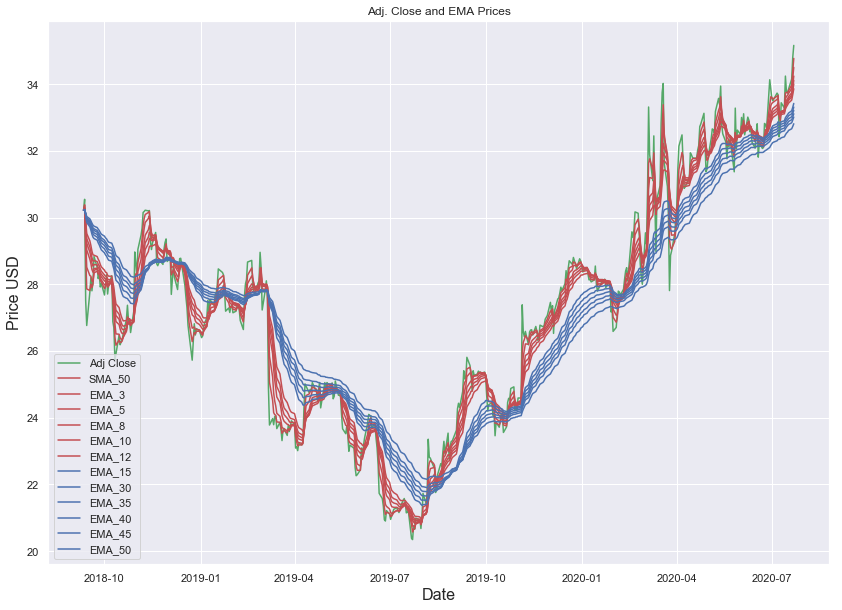

In [211]:
plt.figure(figsize=(14,10))
plt.plot(df['Adj Close'],'g')
plt.plot(df['EMA_3'],'r')
plt.plot(df['EMA_5'],'r')
plt.plot(df['EMA_8'],'r')
plt.plot(df['EMA_10'],'r')
plt.plot(df['EMA_12'],'r')
plt.plot(df['EMA_15'],'r')
plt.plot(df['EMA_30'],'b')
plt.plot(df['EMA_35'],'b')
plt.plot(df['EMA_40'],'b')
plt.plot(df['EMA_45'],'b')
plt.plot(df['EMA_50'],'b')
plt.plot(df['EMA_60'],'b')

plt.title('Adj. Close and EMA Prices')
plt.xlabel('Date',fontsize=16)
plt.ylabel('Price USD', fontsize=16)
plt.legend(df_avgs.columns.values, loc = 'lower left')


In [146]:
plt.figure(figsize=(4,8))
df_avgs.iplot()

<Figure size 288x576 with 0 Axes>